In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from baselines import ZeroUniformOutputBaseline

from network.training_heloc import train_model

model = train_model(
    layers=[23,100,100,2],
    num_epochs=1,
    lr = 0.001,
    batch_size=16,
)[0]



/home/leon/programming/XAI-baselines/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


Final metrics: 
Validation-Loss:  0.589
Validation-Accuracy:  60.9%
train-Loss:  0.578
train-Accuracy:  59.9%
# Parameters: 12702
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=23, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=2, bias=True)
  )
)


In [3]:
import torch
print(f"Prediction of zero baseline: {model.predict(torch.zeros(1, 23)).detach().numpy()})")

baseline_generator = ZeroUniformOutputBaseline(model)
zero_uniform_output_baseline = baseline_generator.get_baseline(x=0)

/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


Prediction of zero baseline: [[0.709216   0.29078403]])


  0%|          | 0/300 [00:00<?, ?it/s]

/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:09<00:00, 32.27it/s]

autobaseline: tensor([ 0.2158,  0.0060,  0.0062,  0.0061,  0.0099,  0.0081,  0.0077,  0.0085,
         0.0089,  0.0082,  0.0054,  0.0075,  0.0066,  0.0086,  0.0080, -0.1578,
        -0.1444, -0.1814,  0.0074,  0.0084,  0.0088,  0.0059,  0.0063],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5001, 0.4999])


  0%|          | 0/986 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 986/986 [00:02<00:00, 372.97it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


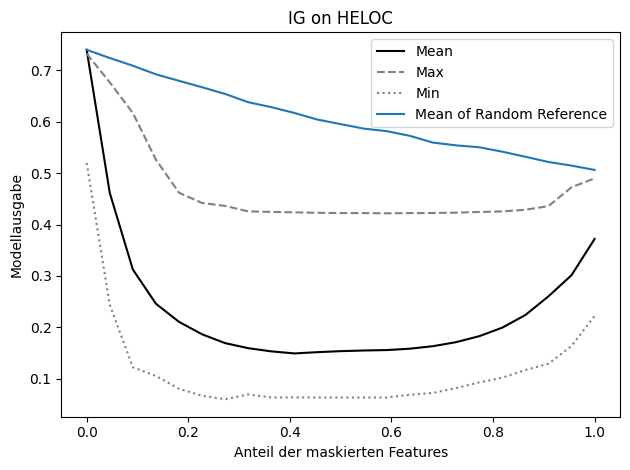

In [4]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC

data = HELOC(mode="validation")

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

In [18]:
from baselines import FurthestUniformOutputBaseline
from data import HELOC
import torch
data = HELOC(mode="validation")


baseline_generator = FurthestUniformOutputBaseline(model,data)
baseline_generator.get_baseline(x= torch.zeros((23)))

Furthest Baseline: tensor([0.5849, 0.3126, 0.0132, 0.3083, 0.6984, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.4235, 0.5455, 0.2900, 0.0312, 0.0758, 0.0606, 0.7188,
        0.6143, 0.6875, 0.5000, 0.8571, 0.8056])
max Baseline: tensor([0.5849, 0.3126, 0.0132, 0.3083, 0.6984, 0.0000, 0.0000, 1.0000, 0.0112,
        1.0000, 1.0000, 0.4235, 0.5455, 0.2900, 0.0312, 0.0758, 0.0606, 0.7188,
        0.6143, 0.6875, 0.5000, 0.8571, 0.8056])


  0%|          | 0/300 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
 48%|████▊     | 145/300 [00:07<00:08, 18.92it/s]


KeyboardInterrupt: 

In [19]:
from baselines import FurthestUniformOutputBaseline
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC

baseline_generator = FurthestUniformOutputBaseline(model,data)

data = HELOC(mode="validation")

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

  0%|          | 0/986 [00:00<?, ?it/s]

max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:13<00:00, 22.72it/s]
/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
  0%|          | 1/986 [00:13<3:37:05, 13.22s/it]

autobaseline: tensor([ 1.7982e-01,  1.4452e-01,  7.2467e-02,  2.5323e-02,  3.4522e-04,
         1.8152e-01,  1.9989e-01,  3.4047e-04,  1.0149e-01,  2.4828e-04,
         2.0325e-04,  1.2973e-01,  9.0450e-02, -2.2277e-04,  2.5040e-01,
        -6.9519e-02, -4.8563e-02, -2.5135e-01, -2.2450e-04,  2.0315e-04,
         3.1432e-04,  8.5413e-06, -6.3727e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4998, 0.5002])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  0%|          | 2/986 [00:22<2:57:46, 10.84s/it]

autobaseline: tensor([ 1.7982e-01,  1.4452e-01,  7.2467e-02,  2.5323e-02,  3.4522e-04,
         1.8152e-01,  1.9989e-01,  3.4047e-04,  1.0149e-01,  2.4828e-04,
         2.0325e-04,  1.2973e-01,  9.0450e-02, -2.2277e-04,  2.5040e-01,
        -6.9519e-02, -4.8563e-02, -2.5135e-01, -2.2450e-04,  2.0315e-04,
         3.1432e-04,  8.5413e-06, -6.3727e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4998, 0.5002])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  0%|          | 3/986 [00:31<2:44:46, 10.06s/it]

autobaseline: tensor([ 1.7982e-01,  1.4452e-01,  7.2467e-02,  2.5323e-02,  3.4522e-04,
         1.8152e-01,  1.9989e-01,  3.4047e-04,  1.0149e-01,  2.4828e-04,
         2.0325e-04,  1.2973e-01,  9.0450e-02, -2.2277e-04,  2.5040e-01,
        -6.9519e-02, -4.8563e-02, -2.5135e-01, -2.2450e-04,  2.0315e-04,
         3.1432e-04,  8.5413e-06, -6.3727e-04], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4998, 0.5002])
max Baseline: tensor([0.0000, 0.1440, 0.0724, 0.0250, 0.0000, 0.1818, 0.2000, 0.0000, 0.1011,
        0.0000, 0.0000, 0.1294, 0.0909, 0.0000, 0.2500, 0.0606, 0.0606, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


  0%|          | 3/986 [00:32<2:59:20, 10.95s/it]


KeyboardInterrupt: 

In [14]:
import torch

def closest_vectors(A, B):
    distances = torch.cdist(A, B)  # Compute pairwise distances between all vectors in A and B
    min_distances, min_indices = torch.min(distances, dim=1)  # Find the minimum distance and its index for each vector in A
    return min_distances, min_indices

# Example usage
A = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # Example set A
B = torch.tensor([[1.5, 2.5], [2.0, 3.0], [4.0, 5.0], [6.0, 7.0]])  # Example set B

min_distances, min_indices = closest_vectors(A, B)
print("Minimum distances:", min_distances)
print("Indices of closest vectors in B:", min_indices)


Minimum distances: tensor([0.7071, 1.4142, 1.4142])
Indices of closest vectors in B: tensor([0, 1, 2])


In [ ]:
from baselines.uniform_output.nearest_furthest_calculator import get_furthest_baseline
from data import HELOC
from baselines import FurthestUniformOutputBaseline

data = HELOC(mode="validation")
baseline_gen = FurthestUniformOutputBaseline(model,data)

print(baseline_gen.get_baseline(x=data[0][0]))



TypeError: unsupported operand type(s) for -: 'Tensor' and 'tuple'

  0%|          | 0/986 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 986/986 [00:02<00:00, 368.79it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


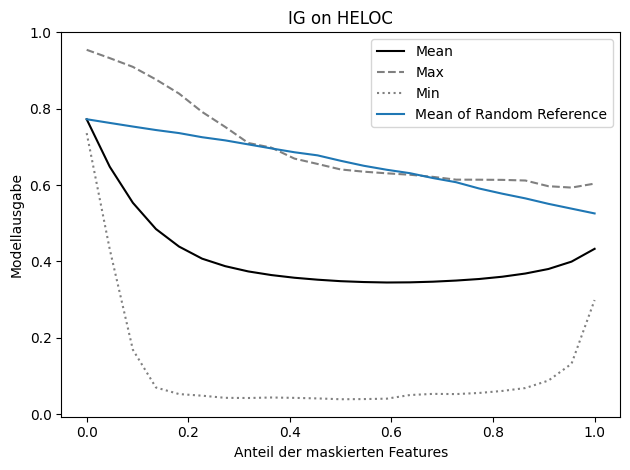

In [ ]:
from baselines import MeanBaseline
from data import HELOC

data = HELOC(mode="validation")

mean_baseline_generator = MeanBaseline(data)
mean_baseline = mean_baseline_generator.get_baseline()

evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=mean_baseline_generator,
    masking_baseline=mean_baseline_generator,
    apply_log=False
)

  0%|          | 0/986 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 986/986 [00:02<00:00, 372.79it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


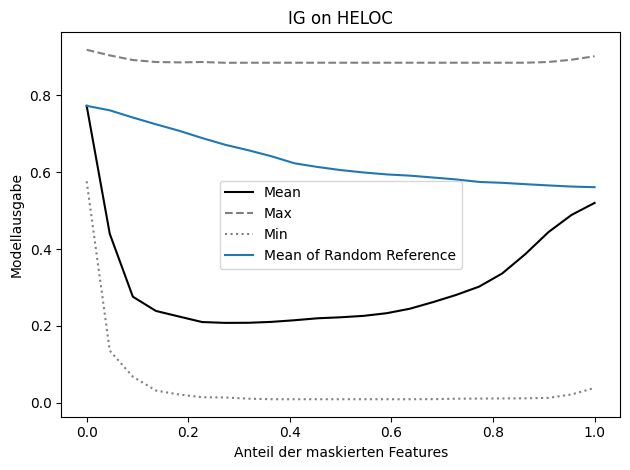

In [ ]:
from baselines import ZeroBaseline
zero_baseline_generator = ZeroBaseline(model)
zero_baseline = zero_baseline_generator.get_baseline()

evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=zero_baseline_generator,
    masking_baseline=zero_baseline_generator,
    apply_log=False
)